In [1]:
# Standard Data Science Utility Belt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# User defined methods
from wrangle import wrangle, wrangle_explore
from acquire import acquire
from functions import get_data_dictionary

# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 
pd.reset_option("display.max_rows", "display.max_columns")

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Project Planning

### Project and Goals

    The goal of this project is to find and document drivers of arabica coffee who have been graded 84 or higher using a
    machine learning classification model.

### Original Hypothesis

    The altitude_mean_meters and the processing_method are the two most important drivers for coffee rating of 84 or higher

### Domain Knowledge Quick Tip
    65–80 = Commodity Coffee The type used to make supermarket coffee, blends and instant.

    80+ = Specialty Coffee The flavours are more subtle, the cup more balanced. At higher end coffee shops, they only buy coffee of 
    84 or higher

    90+ = Presidential Award These prestigious coffees make up less than 1% of the specialty coffee market, they’re just that rare. 
    And that good.

### The Plan

    Setup my environment, create a new repository, update the .gitignore, create a README.md with the data dictionary, project goals,
    and come up with an original hypothesis.
    
    Acquire the data from kaggle
    Clean the data, drop any useless features, remove duplicate observations, double check data-types, find any null values, decide
    what do with null values, and encode the features.
    
    Split the Data, into three data sets named train, validate, and test.
    
    Explore the data, look through the graphs and evaluate each feature to see if they play a part in churn.  Exploration will also
    include two hypotheses, setting of alpha, statistical tests, rejecting or failing to reject the null hypothesis, and
    documentation of the findings and takeaways.
    
    Create Models, create three machine learning models plus a baseline model.  Will be using a DecisionTreeClassifier,
    RandomForestClassifier, and KNeighborsClassifier.  Evaluate models on train and validate datasets.  Pick the model with highest
    validate accuracy to run on my final test data.
    
    Wrap it up, document conclusions, recommendations, and take aways in the final report notebook


# Executive Summary - Conclusions & Next Steps

### Conclusion
    My random forest classifier model accuracy for unseen data (test) was 85% beating my baseline accuracy.
    
    My model confirmed that only half of my original hypothesis was correct. Alttitude was a driver but
    processing_method was not.
    
    My model identified the most important features as 
        - altitude_mean_meters
        - grading_month
        - number_of_bags
        - harvest_year
        - bag_weight
        
    If I had more time I would have liked to,
        - web scraped for newer coffee data  
        - engineer more features
        - find out the average temperature for each region
        - iterate through hyperparameters to boost accuracy
        - have more domain knowledge

### Recommendations


    The data suggests: 
    
    For anyone trying to pursue coffee grades of 84 or higher
        - Use a farm located in a high altitude area
        - Have your coffee ready for grading by December
        - Have a large harvest
        - Use heavier bags of coffee
        
    These are interesting suggestions as I don't have enough domain knowledge to know why having a large havest & heavier bags would
    make a difference in grading score.  I would speculate that the larger the harvest the more it would overshadow any bad coffee
    bean plants but im not 100% certain.
    
    Where as the altitude and grading_month recommendations make more sense.  

### Key Takeaways

    - After the preperation.  The data only had 132 coffees, rated 84 or higher, out of the 838 total observations.
    - The data was dated between the years 2010-2017
    - None of the features like Aroma, Body, Cupper.Points, etc.. were used in the modeling since they are too directly correlated
    with the score
    - Only arabica coffee observations were used

# Data Acquisition

In [59]:
df = acquire()

### .info(), .head(), .describe()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [4]:
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1311.0,656.000763,378.598733,1.0,328.50,656.00,983.50,1312.00
Number.of.Bags,1311.0,153.887872,129.733734,0.0,14.50,175.00,275.00,1062.00
Aroma,1311.0,7.563806,0.378666,0.0,7.42,7.58,7.75,8.75
Flavor,1311.0,7.518070,0.399979,0.0,7.33,7.58,7.75,8.83
Aftertaste,1311.0,7.397696,0.405119,0.0,7.25,7.42,7.58,8.67
Acidity,1311.0,7.533112,0.381599,0.0,7.33,7.50,7.75,8.75
Body,1311.0,7.517727,0.359213,0.0,7.33,7.50,7.67,8.58
Balance,1311.0,7.517506,0.406316,0.0,7.33,7.50,7.75,8.75
Uniformity,1311.0,9.833394,0.559343,0.0,10.00,10.00,10.00,10.00
Clean.Cup,1311.0,9.833120,0.771350,0.0,10.00,10.00,10.00,10.00


### Distribution - "altitude_mean_meters"

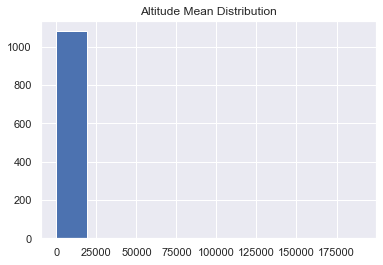

In [6]:
# Graphing distribution
sns.set(font_scale = 1)
df.altitude_mean_meters.hist()
plt.title('Altitude Mean Distribution')
plt.show()

### Distribution - "Number.of.Bags"

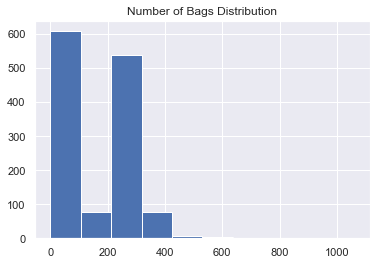

In [7]:
sns.set(font_scale = 1)
df['Number.of.Bags'].hist()
plt.title('Number of Bags Distribution')
plt.show()

### Distribution - "Color"

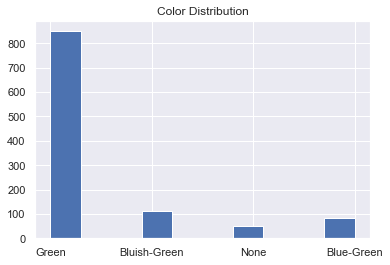

In [8]:
sns.set(font_scale = 1)
df['Color'].hist()
plt.title('Color Distribution')
plt.show()

### Data Dictionary

In [9]:
print(get_data_dictionary(df).to_markdown())

| Feature               | Datatype               | Description                                 |
|:----------------------|:-----------------------|:--------------------------------------------|
| Unnamed: 0            | 1311 non-null: int64   | index column                                |
| Species               | 1311 non-null: object  | Species of coffee bean (arabica or robusta) |
| Owner                 | 1304 non-null: object  | Owner of the farm                           |
| Country.of.Origin     | 1310 non-null: object  | Where the bean came from                    |
| Farm.Name             | 955 non-null: object   | Name of the farm                            |
| Lot.Number            | 270 non-null: object   | Lot number of the beans tested              |
| Mill                  | 1001 non-null: object  | Mill where the beans were processed         |
| ICO.Number            | 1165 non-null: object  | International Coffee Organization number    |
| Company               | 1102

### Target Feature - 'excellent_rating'

In [68]:
# Target feature was engineered from total.Cup.Points
df['excellent_rating'] = np.where(df['Total.Cup.Points'] >= 84, 1, 0)

In [65]:
# Looking at the value counts of the target
df.excellent_rating.value_counts()

0    1053
1     258
Name: excellent_rating, dtype: int64

### Target Distribution

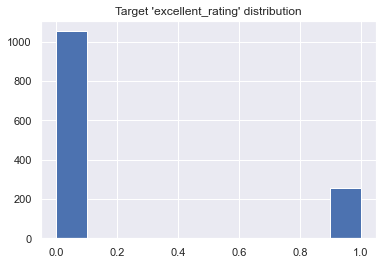

In [67]:
# Graphing the Distribution
sns.set(font_scale = 1)
df.excellent_rating.hist()
plt.title("Target 'excellent_rating' distribution")
plt.show()

### Acquire takeaway
    - 1311 total observations
    - All coffee observations species are of type arabica

# Prepare

#### Dropped Columns

    These columns got dropped because they didn't offer any value:
    
    - Unnamed: 0
    - Owner
    - Farm.Name
    - Company
    - Expiration
    - Lot.Number
    - Mill
    - Producer
    - Certification.Address
    - Certification.Contact
    - ICO.Number
    - Certification.Body
    - In.Country.Partner
    - Owner.1
    - Species
    - Altitude
    - unit_of_measurement
    - altitude_low_meters'
    - altitude_high_meters

#### Handle Nulls

    Dropped any row that was missing a value from the following columns:
    
    - Altitude
    - Region
    - Quakers
    - Harvest.Year
    - Variety
    
    Used the median value to fill in missing values from the following columns:
    
    - Color
    - Processing.Method


#### Convert Data Types

    Changed the following columns data types:
    
    - Bag.Weight -> float
    - Grading.Date -> datetime
    - Harvest.Year -> int

#### Miscellaneous

    - In Color I Converted any Bluish-Green value to Blue-Green
    - In Bag.Weight converted lbs into kg
    - Seperated Grading.Date into three new columns grading_month, grading_year, grading_day
    - Used grading_year to fill in where data was given as a range for harvest_year

#### Rename

    Changed the following columns names to something more conventional:
    
    - Country.of.Origin -> country
    - Region' -> region
    - Number.of.Bags -> number_of_bags
    - Harvest.Year -> harvest_year
    - Grading.Date -> grading_date
    - Variety -> variety
    - Processing.Method -> processing_method
    - Aroma -> aroma
    - Flavor -> flavor
    - Aftertaste -> aftertaste
    - Acidity -> acidity
    - Body -> body
    - Balance -> balance
    - Uniformity -> uniformity
    - Clean.Cup -> clean_cup
    - Sweetness -> sweetness
    - Cupper.Points -> cupper_points
    - Total.Cup.Points -> total_cup_points
    - Moisture -> moisture
    - Category.One.Defects -> category_one_defects
    - Quakers -> quakers
    - Color -> color
    - Category.Two.Defects -> category_two_defects

#### Engineered Features

    - grading_month = from Grading.Date
    - grading_year = from Grading.Date
    - grading_day = from Grading.Date
    - excellent_rating = from total_cup_points >= 84
    - total_bag_weight = number_of_bags * bag_weight
    
#### Removed Outliers

    Dropped any bag weight more than 80 kg
    
    Removed the following values for processing_methods because the samples were too small:
   
        - 'Other'
        - 'Pulped natural / honey'
        
    Removed the following values for variety because the samples were too small:
        
        - Catimor
        - SL14
        - SL28
        - Pacas
        - Gesha
        - Pacamara
        - SL34
        - Java
        - Ethiopian Yirgacheffe
        - Blue Mountain
        - Ruiru 11
        - Ethiopian Heirlooms
        - Sumatra Lintong
        - Sumatra
        - Pache Comun
        - Mandheling
        - Marigojipe
        - Arusha
        - Moka Peaberry
        - Peaberry
        
#### Scaling

    Used a MinMaxScaler()
    
    Columns that got scaled:
  
        - number_of_bags
        - harvest_year
        - aroma
        - flavor
        - aftertaste
        - acidity
        - body
        - balance
        - uniformity
        - clean_cup
        - sweetness
        - cupper_points
        - moisture
        - category_one_defects
        - quakers
        - category_two_defects
        - altitude_mean_meters
        - bag_weight
        - variety_Bourbon
        - variety_Catuai
        - variety_Caturra
        - variety_Mundo Novo
        - variety_Other
        - variety_Typica
        - variety_Yellow Bourbon
        - processing_method_Natural / Dry
        - processing_method_Semi-washed / Semi-pulped
        - processing_method_Washed / Wet
        - color_Green
        - grading_month
        - grading_year
        
#### Encode

    Created dummy columns for:
        - variety
        - processing_method
        - color
        
#### Split

    Split data into three data frames:
    
        - train
        - validate
        - test
        
    Used a random_state of 5868
    Stratified on excellent_rating

### Prepare Takeaway
    - All features and observations have no null or empty values.  
    - All values have been encoded to numberic values
    - test_train_split were stratified on my target feature excellent_rating

# Exploration

In [69]:
# Using wrangle_explore because the values wont be scaled or encoded
train, validate, test = wrangle_explore()

### Original Hypothesis

    The altitude_mean_meters and the processing_method are the two most important drivers for coffee rating of 84 or higher.

# Question # 1

    Is the average elevation for a coffee rated 84 or higher different than coffee whos rating is less than 84?

### Setting up seperate dataframes

In [11]:
# coffee with excellent rating into df_rating
df_rating = train[train['excellent_rating'] == 1]


# coffee with without excellent rating into df_without
df_without = train[train['excellent_rating'] != 1]

In [12]:
# checking number of values in each
len(df_rating), len(df_without)

(74, 395)

### Checking Mean

In [13]:
# with excellent rating altitude mean
df_rating.altitude_mean_meters.mean()

1523.3793729729728

In [14]:
# witout excellent rating altitude mean
df_without.altitude_mean_meters.mean()

1274.6375777215198

### Checking Median

In [15]:
# with excellent rating altitude median
df_rating.altitude_mean_meters.median()

1500.0

In [16]:
# witout excellent rating altitude median
df_without.altitude_mean_meters.median()

1310.64

### Graph

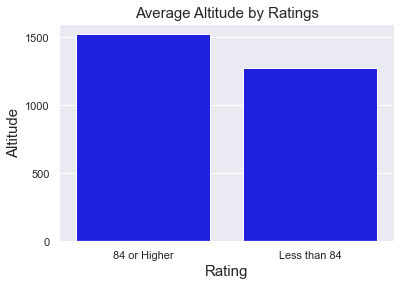

In [17]:
# Graphing the average altitude by ratings
rating = ['84 or Higher', 'Less than 84']
rating_mean = [df_rating.altitude_mean_meters.mean(), df_without.altitude_mean_meters.mean()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('Rating',fontsize = 15, )
ax.set_ylabel('Altitude',fontsize = 15)
ax.set_title('Average Altitude by Ratings', fontsize = 15)
sns.set(font_scale = 2)
ax.set(xlabel='Rating', ylabel='Altitude')
plt.show()

### Question 1 At A Glance

    - 84 or higher rated coffee did have a higher altitude_mean_meters mean & median than coffee whos rating was less than 84.  
    - The mean and median were not too far off from one another for both rated and without

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [18]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    Yes, I seperated excellent rated from non excellent rated

### Normally Distributed?
    - 84 or higher rated coffee altitude mean is normally distributed
    - Less than 84 rated coffee altitude is kind of normally distributed

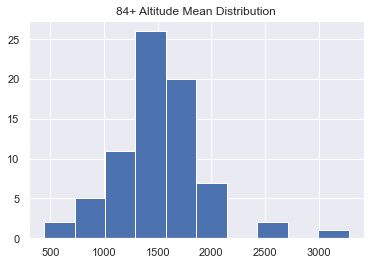

In [19]:
# Graphing the altitude mean distribution
sns.set(font_scale = 1)
df_rating.altitude_mean_meters.hist()
plt.title('84+ Altitude Mean Distribution')
plt.show()

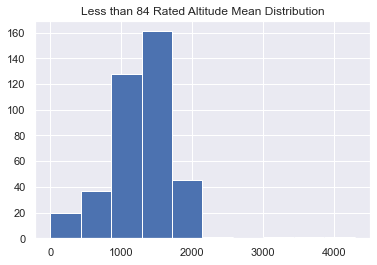

In [20]:
# Graphing the less than 84 rated altitude mean distributioin
df_without.altitude_mean_meters.hist()
plt.title('Less than 84 Rated Altitude Mean Distribution')
plt.show()

### Equal Variances?
    - The leven test concluded the populations did not have equal variances.

In [21]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df_rating.altitude_mean_meters, df_without.altitude_mean_meters)
stats, p

(0.44033741774588486, 0.507287083624284)

In [22]:
# The small p-value suggests that the populations do not have equal variances.
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

populations do have equal variances


### Mann-Whitney's Test
    Assumptions were not met.  I will use a Non-Parametric Test.

### Hypothesis

### $H_0$: There is no difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee.
### $H_a$: There is a difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee.

In [23]:
# From stats library using the mannwhitneyu, returning a stats and p value
stat, p = mannwhitneyu(df_rating.altitude_mean_meters, df_without.altitude_mean_meters)
stat, p

(10002.0, 8.054287930351236e-06)

In [24]:
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject Null Hypothesis


### Hypotheis Results
    - There is a difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee

### Question 1 Takeway
    - I have a 95% confidence level that there is a difference in altitude between 84 or higher rated and less than 84 rated coffee.  
    - 84 or higher rated coffee has a higher mean/median altitude than less than 84 rated coffee
    - altitude_mean_meters seems to be a good fit or useful for modeling.  I will include it in my models and see if this is true. 

# Question 2

    Is the average bag_weight for a coffee rated 84 or higher different than the weight of all coffee?

### Setting up seperate dataframes

In [25]:
# df_rating is equal to a coffee rating 84 or higher
df_rating = train[train['excellent_rating'] == 1]

In [26]:
# checking number of values in each
len(df_rating), len(train)

(74, 469)

### Checking Mean

In [27]:
# bag_weight mean for coffee rated 84 or higher 
df_rating.bag_weight.mean()

40.986486486486484

In [28]:
# Entire population bag_weight mean
train.bag_weight.mean()

33.850746268656714

### Graph

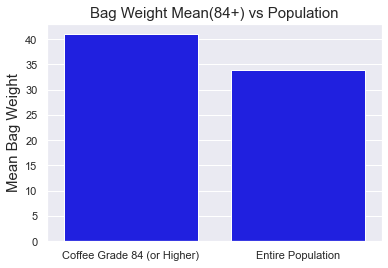

In [29]:
# Graphing the Bag Weight Mean vs Population
rating = ['Coffee Grade 84 (or Higher)', 'Entire Population']
rating_mean = [df_rating.bag_weight.mean(), train.bag_weight.mean()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('',fontsize = 15, )
ax.set_ylabel('Bag Weight',fontsize = 15)
ax.set_title('Bag Weight Mean(84+) vs Population', fontsize = 15)
sns.set(font_scale = 1)
ax.set(xlabel='', ylabel='Mean Bag Weight')
plt.show()

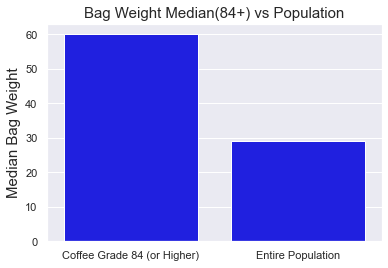

In [30]:
# Graphing the Bag Weight Median vs Population
rating = ['Coffee Grade 84 (or Higher)', 'Entire Population']
rating_mean = [df_rating.bag_weight.median(), train.bag_weight.median()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('',fontsize = 15, )
ax.set_ylabel('Bag Weight',fontsize = 15)
ax.set_title('Bag Weight Median(84+) vs Population', fontsize = 15)
sns.set(font_scale = 1)
ax.set(xlabel='', ylabel='Median Bag Weight')
plt.show()

### Question 2 At A Glance

    - 84 or higher rated coffee did have a higher bag_weight mean than the entire population of coffee.  
    - The mean were not too far off from one another

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [31]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    No not independent because the entire population includes 84 or higher graded coffee

### Normally Distributed?
    - 84 or higher rated bag weight is not normally distributed
    - Entire population is not normally distributed

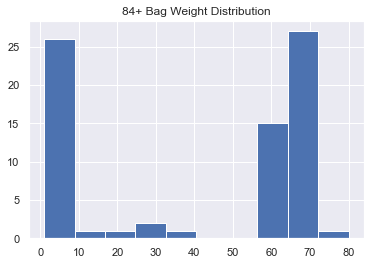

In [32]:
# Graphing the Bag Weight Distribution
sns.set(font_scale = 1)
df_rating.bag_weight.hist()
plt.title('84+ Bag Weight Distribution')
plt.show()

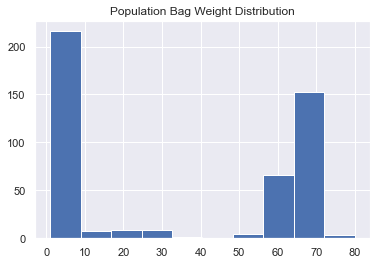

In [33]:
# Graphing population bag weight distribution
train.bag_weight.hist()
plt.title('Population Bag Weight Distribution')
plt.show()

### Equal Variances?
    - The leven test concluded the populations did not have equal variances.

In [34]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df_rating.bag_weight, train.bag_weight)
stats, p

(10.16763616986114, 0.0015119628803599763)

In [35]:
# The small p-value suggests that the populations do not have equal variances.
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

populations do not have equal variances


###  Wilcoxon
    Assumptions were not met.  I will use a Non-Parametric Test.

### Hypothesis

### $H_0$: The average bag_weight of 84 or higher rated coffee is not different than the average of the entire population.
### $H_a$: The average bag_weight of 84 or higher rated coffee is different than the average of the entire population.

### Hypothesised Median

In [36]:
# taking the median of the bag_weight for wilcoxon test
hypo_med = df_rating.bag_weight.median()
hypo_med

60.0

In [37]:
# From stats library using wilcoxon test
z, p = wilcoxon(train.bag_weight - hypo_med)
z, p

(12694.0, 4.0608607540315044e-34)

In [38]:
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject Null Hypothesis


### Hypotheis Results
    - The average bag_weight of 84 or higher rated coffee is different than the average of the entire population.

### Question 2 Takeway
    - I have a 95% confidence level that there is a difference in bag_weight between 84 or higher rated and the entire population of coffee.
    - However thee means were not too far off from one another

# Question 3

    - Which processing_method has a higher percentage of 84 or higher rated coffee?

In [39]:
# Checking vaule counts of processing_method
train.processing_method.value_counts()

Washed / Wet                 368
Natural / Dry                 81
Semi-washed / Semi-pulped     20
Name: processing_method, dtype: int64

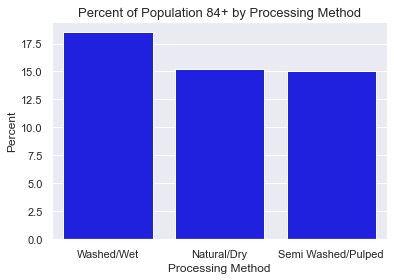

In [41]:
# Creating a series with percentages of processing method 84 or higher rated coffee by population
s = ((df_rating.processing_method.value_counts()/train.processing_method.value_counts())*100).sort_values(ascending = False)

# Graphing The Series
index_ = list(s.index)
index_[0] = 'Washed/Wet'
index_[1] =  'Natural/Dry'
index_[2] = 'Semi Washed/Pulped'
s.index = index_
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84+ by Processing Method', fontsize = 13)
sns.set(font_scale = 1.1)
ax.set(xlabel='Processing Method', ylabel='Percent')
plt.show()

### Question 3 Takeway
    - Washed/Wet had more 84 or higher rated coffee but not by much
    - I was hoping to see a bigger trend in 84 or higher rated coffee
    - The three processing process are fairly close.
    - I will added them to my model to see if they provide value and document the resutls

# Question 4

    - Which variety has a higher percentage of 84 or higher rated coffee?

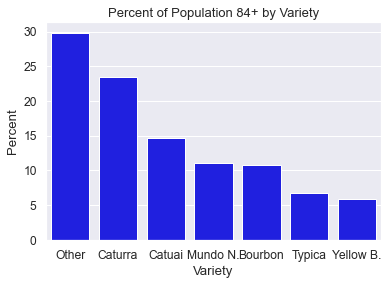

In [42]:
# Creating a series with percentages of Variety 84 or higher rated coffee by population
s = ((df_rating.variety.value_counts()/train.variety.value_counts())*100).sort_values(ascending = False)
index_ = list(s.index)
index_[3] = 'Mundo N.'
index_[6] = 'Yellow B.'
s.index = index_

ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84+ by Variety', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Variety', ylabel='Percent')
plt.show()

### Question 4 Takeway
    - 'Other' had more 84 or higher rated coffee than any other variety
    - There was a lot of variance in the variety percentage 84 or higher by total population
    - 'variety' seems like a good feature to use in modeling.  I will use it and document the results

# Question 5

    - Which harvest year had a higher percentage of 84 or higher rated coffee?

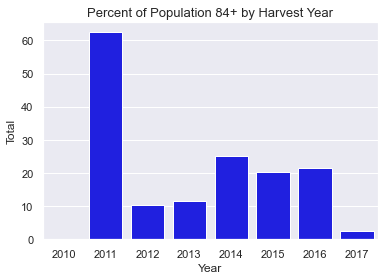

In [43]:
# Creating a series with percentages of harvest year 84 or higher rated coffee by population
s = ((df_rating.harvest_year.value_counts(ascending=True)/train.harvest_year.value_counts(ascending=True))*100).sort_values()

# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84+ by Harvest Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Year', ylabel='Total')
plt.show()

### Question 5 Takeway

    - There were only a few values for the year 2010 & 2011. Although those years seem like they did well, they are really outliers.
    - Also keep in mind I filled in missing values for harvest year as the median so this feature might not be the best for modeling.
    - If time allows I will try and see how it does in my model, as it is, and document the results.
    - If time allows I will also remove outliers to see if its boosts model performance and document the results.

# Question 6

    - Which grading year had a higher percentage of 84 or higher rated coffee?

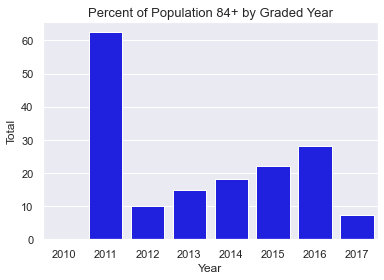

In [44]:
# Creating a series with percentages of graded year 84 or higher rated coffee by population
s = (df_rating.grading_year.value_counts()/train.grading_year.value_counts()*100).sort_values()

# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84+ by Graded Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Year', ylabel='Total')
plt.show()

### Question 6 Takeway
    - The grading year of 2011 was the greatest year for 84 or higher rated coffee.
    - This feature was more dependable than harvest year because zero values were missing
    - This features seems useful to try and use in my model
    - I will add it and document the results

# Question 7

    - Which grading month had a higher percentage of 84 or higher rated coffee?

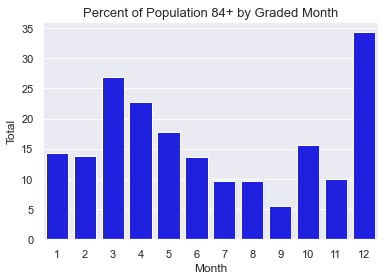

In [45]:
# Creating a series with percentages of graded year 84 or higher rated coffee by population
s = (df_rating.grading_month.value_counts()/train.grading_month.value_counts()*100).sort_values()

# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84+ by Graded Month', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Month', ylabel='Total')
plt.show()

### Question 7 Takeway
    - The "grading_month" of Decemeber was the greatest month for 84 or higher rated coffee.
    - This features seems useful to try and use in my model
    - I will add it and document the results

# Exploration Take Away

### Features I am predicting to do reasonably well in my model.  
    'altitude'
    'bag_weight'
    'processing_method'
    'variety'
    'harvest_year'
    'graded_year'
    'graded_month'


# Modeling

In [70]:
# Using just wrangle() so that the values will be scaled and encoded
train, validate, test = wrangle()

### Threshold allocation

In [47]:
# .05 is the maximum amout im willing my train and validate accuracy to be away from one another.
threshold = .05

# Baseline

In [48]:
# Which Value is common fr
train.excellent_rating.value_counts()

0    395
1     74
Name: excellent_rating, dtype: int64

In [49]:
baseline_accuracy = (train.excellent_rating == 0).mean()
print(f"Baseline Accuracy is: {round(baseline_accuracy, 3)*100}%")

Baseline Accuracy is: 84.2%


# Decision Tree Classifier

## Removing any feature directly involved in the scoring of each coffee

In [50]:
# features is grabbing all the columns from train
features = list(train.columns)

# Removing target from features
features.remove('excellent_rating')

# Removing any feature directly involved in the scoring of each coffee
features.remove('aroma_scaled')
features.remove('flavor_scaled')
features.remove('aftertaste_scaled')
features.remove('acidity_scaled')
features.remove('body_scaled')
features.remove('balance_scaled')
features.remove('uniformity_scaled')
features.remove('clean_cup_scaled')
features.remove('sweetness_scaled')
features.remove('cupper_points_scaled')
features.remove('moisture_scaled')
features.remove('category_one_defects_scaled')
features.remove('quakers_scaled')
features.remove('category_two_defects_scaled')

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

In [51]:
# Make the model
clf = DecisionTreeClassifier(max_depth=2, random_state=123)

# Fit the model
clf = clf.fit(X_train, y_train)

# Train
y_pred = clf.predict(X_train)
train_accuracy = clf.score(X_train, y_train)

# Validate

y_pred = clf.predict(X_validate)
validate_accuracy = clf.score(X_validate, y_validate)


print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(clf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of Decision Tree classifier on training set: 0.855
Accuracy of Decision Tree classifier on validate set: 0.841
Passes Treshold Allocation: True


### Decision Tree with all features minus scoring takeaways
    - Altitude was top feature
    - Did not beat baseline
    - Best Depth 2 @ .841 accuracy on validate

# KNN

In [52]:
# Using only the features I explored in my exploration
features = ['variety_Bourbon_scaled',
    'variety_Catuai_scaled',
    'variety_Caturra_scaled',
    'variety_Mundo Novo_scaled',
    'variety_Other_scaled',
    'variety_Typica_scaled',
    'variety_Yellow Bourbon_scaled',
    'processing_method_Natural / Dry_scaled',
    'processing_method_Semi-washed / Semi-pulped_scaled',
    'processing_method_Washed / Wet_scaled',
    'altitude_mean_meters_scaled',
    'grading_month_scaled',
    'grading_year_scaled',
    'bag_weight_scaled']

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

In [53]:
# Make the model
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)

# Train
y_pred = knn.predict(X_train)
train_accuracy = knn.score(X_train, y_train)

# Validate
y_pred = knn.predict(X_validate)
validate_accuracy = knn.score(X_validate, y_validate)

print('Accuracy of K Neighbors classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K Neighbors classifier on validate set: {:.3f}'
      .format(knn.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of K Neighbors classifier on training set: 0.84
Accuracy of K Neighbors classifier on validate set: 0.841
Passes Treshold Allocation: True


### KNN with all features from exploration
    - Did not beat baseline
    - Best Model at n_neighbors = 9 @ .841 accuracy on validate

# Random Forest Classifier

In [54]:
# Ran many Random Foret Classifiers in my modeling juypter notebook, these features were the best results 
features = ['altitude_mean_meters_scaled',
            'grading_month_scaled',
            'number_of_bags_scaled',
            'harvest_year_scaled',
            'bag_weight_scaled']

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

In [55]:
# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of random forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of random forest classifier on training set: 0.87
Accuracy of random forest classifier on validate set: 0.861
Passes Treshold Allocation: True


### Random Forest Classifier Takeaway
    - Best Validate Model at .861 accuracy on validate
    - Hyperparameters used leaf=2, depth =5

# Best Model
    - Random Forest Classifier Takeaway
    - Best Validate Model at .861 accuracy on validate
    - Hyperparameters used leaf=2, depth =5
    - Features used
        - 'altitude_mean_meters_scaled',
        - 'grading_month_scaled',
        - 'number_of_bags_scaled',
        - 'harvest_year_scaled'
        - 'bag_weight_scaled'
    - To see the results of many more models refer to my modeling juypter notebook

# Running Test

In [56]:
# Same features as my best Model
features = ['altitude_mean_meters_scaled',
            'grading_month_scaled',
            'number_of_bags_scaled',
            'harvest_year_scaled',
            'bag_weight_scaled']

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

In [57]:
# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

# Test
y_pred = rf.predict(X_test)
test_accuracy = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.3f}'
      .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))
print('Accuracy of Random Forest classifier on test set: {:.3f}'
      .format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.874
Accuracy of Random Forest classifier on validate set: 0.861
Accuracy of Random Forest classifier on test set: 0.851


# Test Takeaways
    - Tested my model using unseen data
    - Beat my baseline model.
    - Test accuracy was slightly lower than train and validate.
    - Final test confirms only half of my orginal hypothesis was correct, alttitude was a driver but processing_method was not

- Things to do
    - Paste my plan over from my notes
    - include data aquistion
    - orginaly hypothesis paste over
    - include outlier and scaling documentation
    - finish Executive Summary
    - add more comments where needed
    - check docustring for functions
- READ me
    - remove any functions not used
- Data Dictionary
- csv file
- Copy to a new document so the error goes away 